## Lab 2
### Clasificación

Miembros:
- Alejandro Gómez
- Oscar López

#### 1.1 Exploración rápida de datos, resumen dataset

In [75]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp
from pandas.plotting import scatter_matrix

In [76]:
# Leer data
breast_cancer = pd.read_csv('breast-cancer-wisconsin.data', header=None)

# Resumen del dataset
resumen = breast_cancer.describe()

# Resumen
print(resumen)

                 0           1           2           3           4   \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               5           7           8           9           10  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

#### 1.2 Tipo de variables

In [77]:
# 1. Agregar nombres a las columnas

titulosColumnas = []
with open('breast-cancer-wisconsin.names') as f:
    for l in f:
        separacion = l.split("  ")
        bloque1 = separacion[0]
        titulosColumnas.append(bloque1)

breast_cancer.columns = titulosColumnas
print(breast_cancer.columns)

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [78]:
# Verificación de datos
print(breast_cancer.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1


### Definición de variables

- Clump Thickness = Cuantitativa discreta
- Uniformity of Cell Size = Cuantitativa discreta
- Uniformity of Cell Shape = Cuantitativa discreta
- Marginal Adhesion = Cuantitativa discreta
- Single Epithelial Cell Size = Cuantitativa discreta
- Bare Nuclei = Cuantitativa discreta
- Bland Chromatin = Cuantitativa discreta
- Normal Nucleoli = Cuantitativa discreta



- Mitoses = Cuantitativa discreta



- Class = Categórica

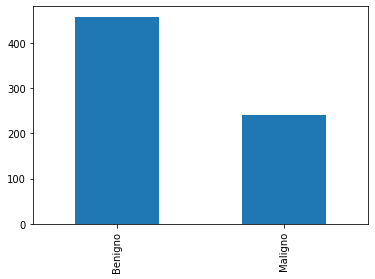

In [79]:
# Gráfico categórico
conteoClase = breast_cancer['Class'].value_counts()
conteoClase.plot(kind='bar')

# Cambio de labels en X
plt.xticks([0, 1], ['Benigno', 'Maligno'])
# Mostrar gráfico
plt.show()

In [80]:
# Tabla de frecuencias
conteoClase = breast_cancer['Class'].value_counts()
print("Tabla de frecuencias")
print(conteoClase)

Tabla de frecuencias
2    458
4    241
Name: Class, dtype: int64


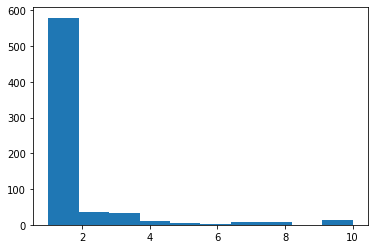

In [81]:
plt.hist(breast_cancer['Mitoses'])
plt.show()

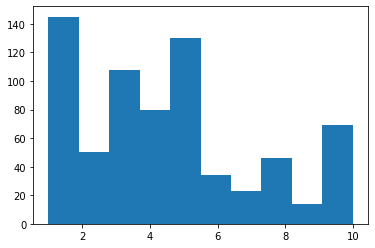

In [82]:
plt.hist(breast_cancer['Clump Thickness'])
plt.show()

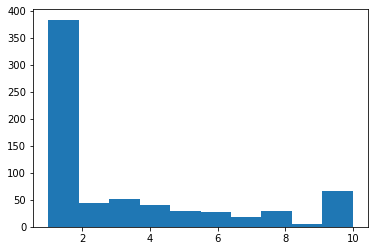

In [83]:
plt.hist(breast_cancer['Uniformity of Cell Size'])
plt.show()

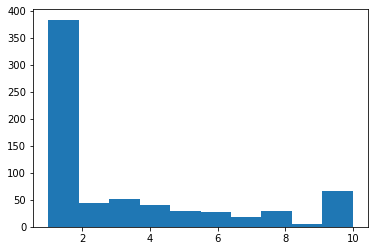

In [84]:
plt.hist(breast_cancer['Uniformity of Cell Size'])
plt.show()

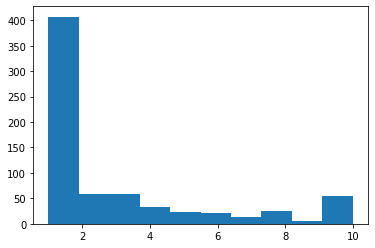

In [85]:
plt.hist(breast_cancer['Marginal Adhesion'])
plt.show()

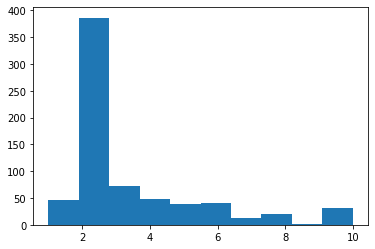

In [86]:
plt.hist(breast_cancer['Single Epithelial Cell Size'])
plt.show()

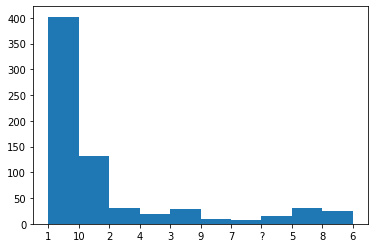

In [87]:
plt.hist(breast_cancer['Bare Nuclei'])
plt.show()

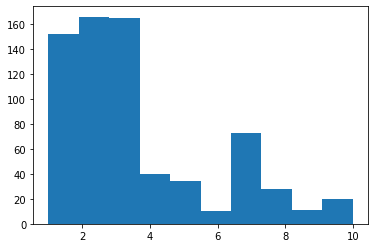

In [88]:
plt.hist(breast_cancer['Bland Chromatin'])
plt.show()

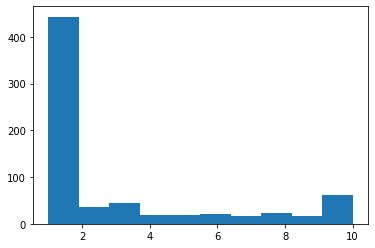

In [89]:
plt.hist(breast_cancer['Normal Nucleoli'])
plt.show()

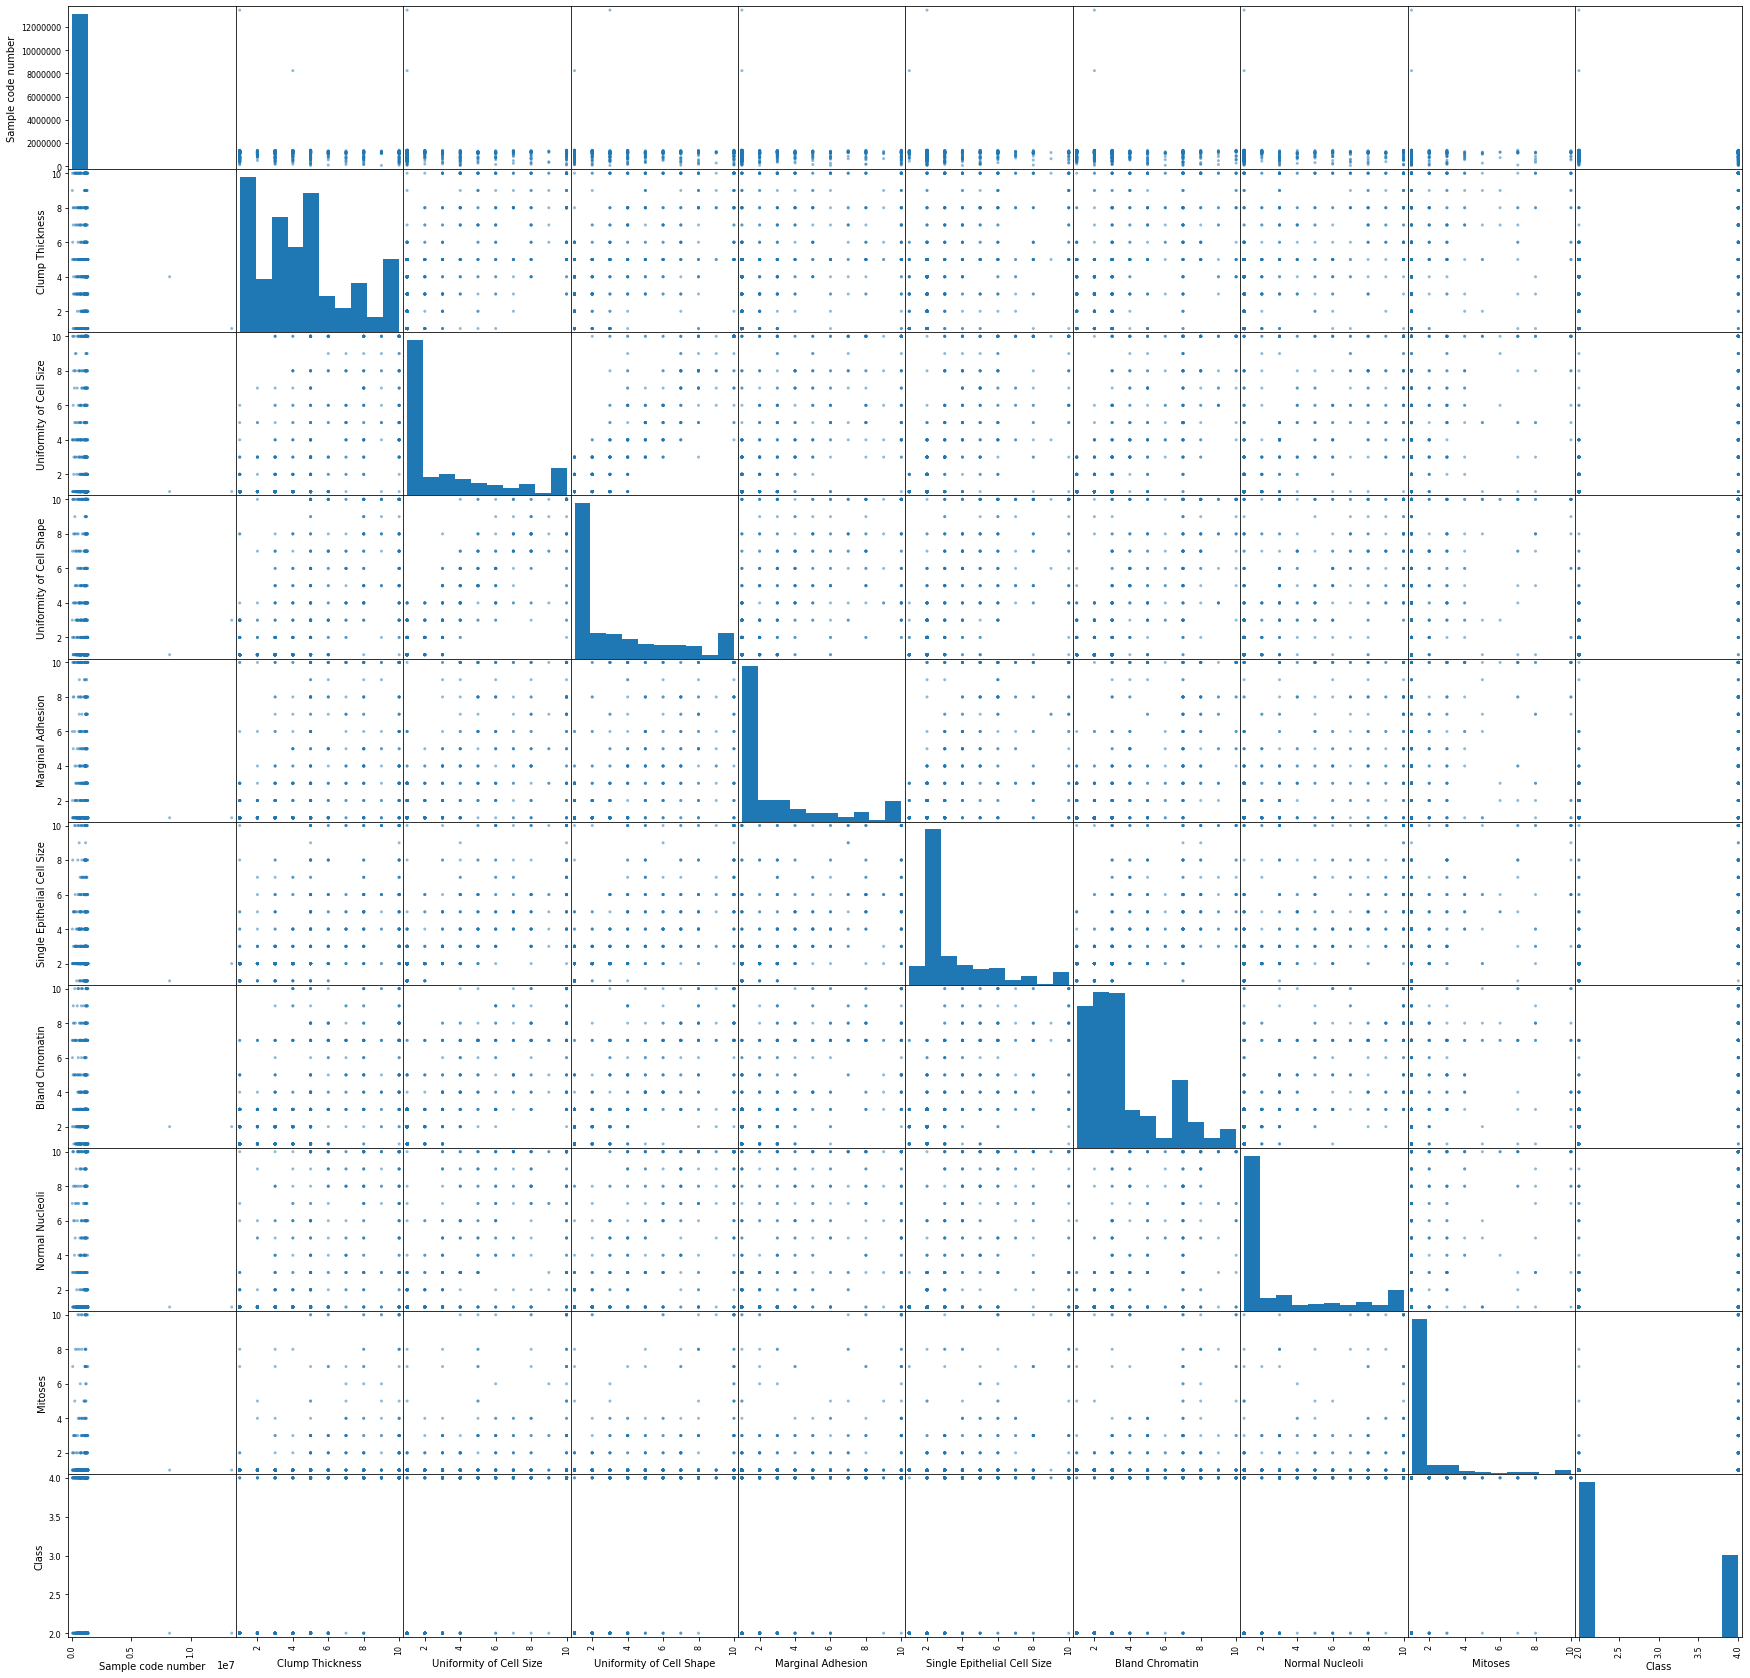

In [90]:
pd.plotting.scatter_matrix(breast_cancer, figsize=(30, 30))
plt.show()

<AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='Uniformity of Cell Size'>

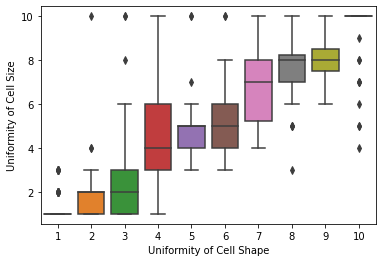

In [91]:
sns.boxplot(x='Uniformity of Cell Shape', y='Uniformity of Cell Size', data=breast_cancer)

In [92]:
# Separación de variables categóricas y numéricas

num_cols = breast_cancer.select_dtypes(include=['int64', 'float64']).drop('Class', axis=1)
category_cols =  breast_cancer['Class']

In [93]:
# Análisis de correlación

num_cols.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses
Sample code number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000


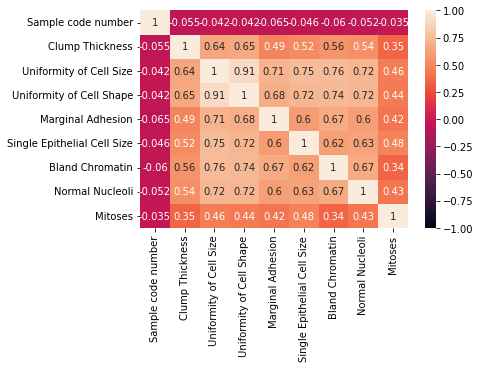

In [94]:
sns.heatmap(num_cols.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [95]:
# Limpieza de datos

# Se eliminan los datos que no tienen valor
breast_cancer.dropna()

# Se droppea columna sample code number
breast_cancer.drop('Sample code number', axis=1, inplace=True)

#### Conclusiones y hallazgos:

- El análisis exploratorio brindó una mejor perspectiva de lo siguiente:
    - Se encontró que la mejor forma de graficar los datos fue según el tipo de variable que era. En este caso, varias de las variables entraban dentro de la categoría de cuantitativa discreta por el rango de valores. Cabe destacar que el dato de las clases era de tipo categórico. Esto debido a que solamente brindaba información respecto a que tipo de tumor era (benigno, maligno).
- La implementación de librerías como Pandas, Numpy, Matplotlib y sns resultaron bastante buenas para tener una perspectiva clara de la data que manejabamos.
- Los histogramas